In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Read the CSV file
df = pd.read_csv("/home/neethu/Downloads/StudentsPerformance (2).csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [6]:
df.shape

(1000, 8)

In [4]:
# Step 2: Finding the number of males and females
gender_counts = df["gender"].value_counts()
print("Number of Males:", gender_counts["male"])
print("Number of Females:", gender_counts["female"])

Number of Males: 482
Number of Females: 518


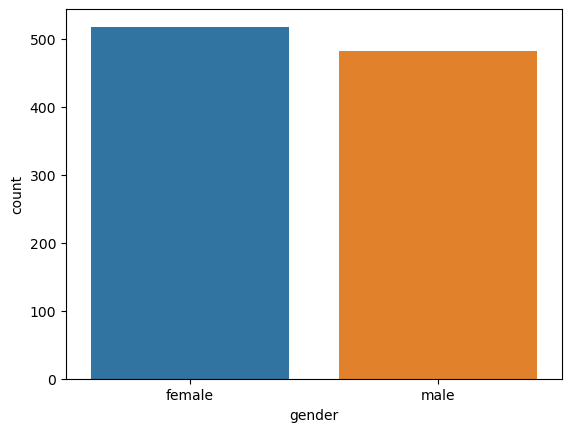

In [7]:
sns.countplot(x=df.gender)
plt.show()

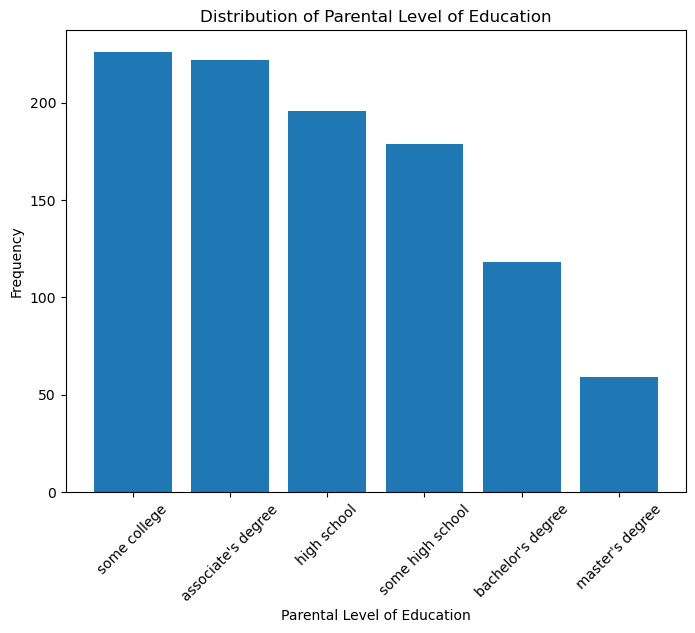

In [8]:
#  Visualization of Parental Level of Education
parental_education_counts = df["parental level of education"].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(parental_education_counts.index, parental_education_counts.values)
plt.xlabel("Parental Level of Education")
plt.ylabel("Frequency")
plt.title("Distribution of Parental Level of Education")
plt.xticks(rotation=45)
plt.show()


In [9]:

# Step 3: Average Scores based on Gender and Test Preparation Course
average_scores = df.groupby(["gender", "test preparation course"])[["math score", "reading score", "writing score"]].mean()
print("Average Scores based on Gender and Test Preparation Course:")
print(average_scores)

Average Scores based on Gender and Test Preparation Course:
                                math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948


In [10]:
# Step 4: Scoring Variation based on Gender and Test Preparation Course
score_variation = df.groupby(["gender", "test preparation course"])[["math score", "reading score", "writing score"]].std()
print("Scoring Variation based on Gender and Test Preparation Course:")
print(score_variation)

Scoring Variation based on Gender and Test Preparation Course:
                                math score  reading score  writing score
gender test preparation course                                          
female completed                 14.428233      12.695493      12.240788
       none                      16.510686      14.636981      15.016497
male   completed                 14.039164      13.612420      12.887910
       none                      14.335746      13.595718      13.468284


In [11]:
# Step 5: Providing Bonus Points to the Top 25% of Students based on Math Scores
top_25_percentile = df["math score"].quantile(0.75)
bonus_points = 5  # You can set the number of bonus points as desired

In [12]:
# Create a new column to store bonus points
df["bonus points"] = df["math score"].apply(lambda x: bonus_points if x > top_25_percentile else 0)


In [13]:
# Print the updated DataFrame with bonus points
print("Updated DataFrame with Bonus Points:")
print(df.head())

Updated DataFrame with Bonus Points:
   gender race/ethnicity parental level of education         lunch  \
0  female        group C            some high school  free/reduced   
1  female        group B                 high school  free/reduced   
2  female        group B            some high school  free/reduced   
3  female        group B                some college      standard   
4  female        group C                some college  free/reduced   

  test preparation course  math score  reading score  writing score  \
0                    none           0             17             10   
1                    none           8             24             23   
2                    none          18             32             28   
3                    none          11             38             32   
4                    none          22             39             33   

   bonus points  
0             0  
1             0  
2             0  
3             0  
4             0  
